### Imports

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

### Open required data frames. PATH, FLIGHT DATA, ERROR AND FEATURES

In [97]:
#Select which path you wanna visualize.
path_num = 1

energy_df = pd.read_csv('../data_base/paths_energy/features_pathv8_CA.csv', sep=",")
fd_df = pd.read_csv('../data_base/flight_data/fd_pathv8_saloCA.txt', sep="|",low_memory=False)
path_df = pd.read_csv('../data_base/random_paths/path_v8_salo.txt', sep="|")

#Select only data from desired path
current_fdPoint_info = fd_df.loc[(fd_df['route_num'] == path_num)]
current_path_info = path_df.loc[(path_df['path_num'] == path_num)]
current_features_info = energy_df.loc[(energy_df['path_num'] == path_num)]

print(current_path_info)

if current_features_info.empty:
    print('Features está vacio')
elif current_fdPoint_info.empty:
    print('Flight Data está vacio')
elif current_path_info.empty:
    print('Path está vacio')

   path_num                              points             times
0         1  0,0,1; 0,1,1; 1,1,1; 1,0,1; 0,0,1   50,50,90,100,150


### Graficas de posicion deseada vs posicion simulada.

punto ['0,0,1', ' 0,1,1', ' 1,1,1', ' 1,0,1', ' 0,0,1 ']
intpointlist:  [[0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1]]


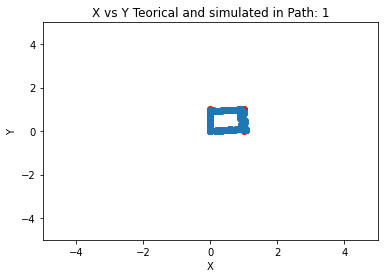

In [105]:
intPoints_list = []
#Extract points in path for graph
points_list = str(current_path_info['points'].iloc[0]).split(';')
print('punto',points_list)

for i in points_list:
    intPoints = list(map(int,i.split(','))) #convert time strings to int
    intPoints_list.append(intPoints)
        
#Graph extracted points
print('intpointlist: ', intPoints_list)
for loc in intPoints_list:
    plt.scatter(loc[0], loc[1], color='red')
plt.scatter(current_fdPoint_info['pos_x'], current_fdPoint_info['pos_y'])
plt.title('X vs Y Teorical and simulated in Path: ' + str(path_num))
plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim([-5, 5])
#plt.ylim([-5, 5])
plt.show()


### Energy depending of distance.

<AxesSubplot:xlabel='teo_point_dist'>

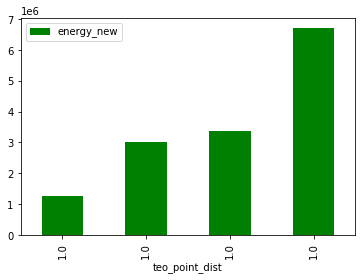

In [99]:
#Plot energy used depending of distance.
sortedDF_dist = current_features_info.sort_values(by=['teo_point_dist'])
sortedDF_dist.plot(x='teo_point_dist', y = 'energy_new', kind = 'bar', color='green')


### Energy depending on axis distance

<AxesSubplot:xlabel='teo_Ydist'>

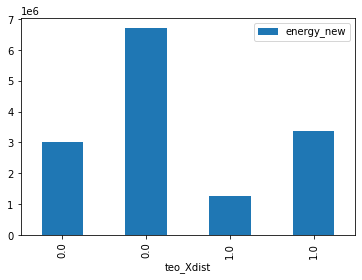

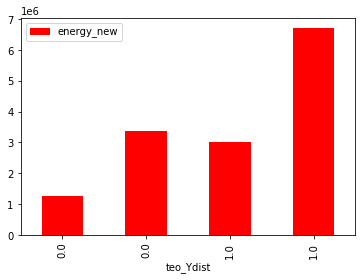

In [100]:
#Plot energy used depending of axis distance.
current_features_info['teo_Xdist'].abs()
sortedDF_distX = current_features_info.sort_values(by=['teo_Xdist'])
sortedDF_distX.plot(x='teo_Xdist', y = 'energy_new', kind = 'bar')

current_features_info['teo_Ydist'].abs()
sortedDF_distX = current_features_info.sort_values(by=['teo_Ydist'])
sortedDF_distX.plot(x='teo_Ydist', y = 'energy_new', kind = 'bar', color = 'red')

### Energy depending of simulated distance

<AxesSubplot:xlabel='sim_point_dist'>

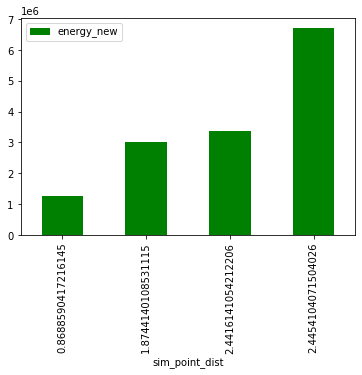

In [101]:
#Plot energy used depending of time.
sortedDF_time = current_features_info.sort_values(by=['sim_point_dist'])
sortedDF_time.plot(x='sim_point_dist', y = 'energy_new', kind = 'bar', color='green')

### Energy depending of time.

<AxesSubplot:xlabel='sim_drone_time'>

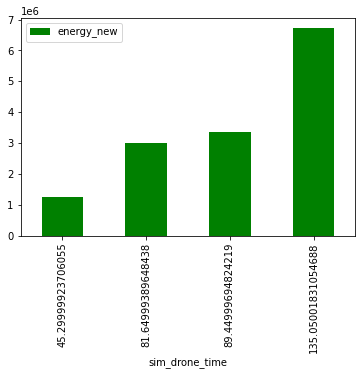

In [102]:
#Plot energy used depending of time.
sortedDF_time = current_features_info.sort_values(by=['sim_drone_time'])
sortedDF_time.plot(x='sim_drone_time', y = 'energy_new', kind = 'bar', color='green')

### Energy depending of velocity.

<AxesSubplot:xlabel='teo_point_vel'>

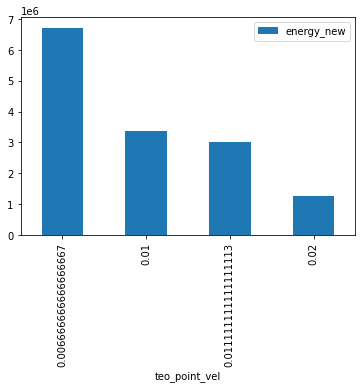

In [103]:
sortedDF_time = current_features_info.sort_values(by=['teo_point_vel'])
sortedDF_time.plot(x='teo_point_vel', y = 'energy_new', kind = 'bar')

### Energy used in each point.

<AxesSubplot:xlabel='missing_points'>

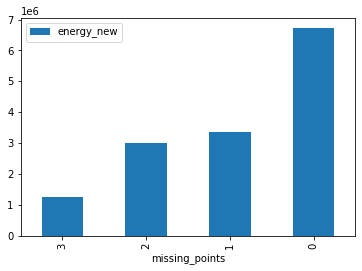

In [104]:
#Plot energy used in each point.
current_features_info.plot(x='missing_points', y = 'energy_new', kind = 'bar')